In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import Timestamp
import folium
import plotly.express as px
import plotly as py
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_csv('/kaggle/input/additional-file-competition-locus/invoice-llm-prediction-final(1).csv')
df.head()

,title,invoice_number,invoice_number_bbox,issue_date,issue_date_bbox,total,total_bbox,table,table_bbox
0,fd28f5e7-fc19-4f23-8dec-9a87b40f1a15.jpg,KBM/15-16/S0229,"[1119, 308, 1392, 349]",31/08/2015,"[1134, 343, 1286, 384]",310693.0,"[1274, 1325, 1388, 1358]",Product Description Amount TATA NANO TWIST XTA...,"[594, 593, 1388, 1358]"
1,c4141ea0-72cc-46f8-826f-a5d80451f8e5.jpg,Ne,"[283, 36, 294, 43]",19/11/2020,"[370, 48, 417, 57]",7000.0,"[444, 227, 483, 237]",Si Partculers Gusnity ale per Amount\n\n11) Re...,"[11, 190, 280, 43]"
2,77502028-18e6-4a51-9b7d-0cc5f4a68726.jpg,B202001676,"[620, 499, 720, 510]",07/03/2020,"[180, 891, 262, 912]",15576.0,"[713, 1967, 751, 1978]",S.No. Parts/OP code _—Part Labor Description H...,"[128, 746, 855, 840]"
3,e8d8c551-7a88-4f7d-bccf-4b205317b21e.jpg,123456789-SA,"[515, 1702, 741, 1729]",14/09/2017,"[1494, 1702, 1564, 1729]",918.0,"[2200, 3010, 2310, 3041]",Items in this shipment Ordered Shipment Follow...,"[200, 2063, 2310, 3041]"
4,a7e533f9-fea3-453e-b135-6b6d9d3c63a6.jpg,48,"[527, 566, 556, 586]",18/12/2014,"[529, 517, 671, 537]",121.0,"[1355, 1449, 1454, 1469]",Product Quantity Lda)\nSimple product 1 €100.0...,"[185, 910, 1454, 1469]"


In [66]:
df.drop(columns = ['invoice_number_bbox','issue_date_bbox','total_bbox','table_bbox'], inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           41 non-null     object 
 1   invoice_number  35 non-null     object 
 2   issue_date      40 non-null     object 
 3   total           40 non-null     float64
 4   table           40 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.7+ KB


In [68]:
df.isna().sum()

title             0
invoice_number    6
issue_date        1
total             1
table             1
dtype: int64

In [74]:
df.dropna(subset=['issue_date'], inplace=True)
df['invoice_number'] = df['invoice_number'].fillna('Empty-001')
df['total'] = df['total'].fillna('0')
df['table'] = df['table'].fillna('NULL')

In [75]:
df.isna().sum()

title             0
invoice_number    0
issue_date        0
total             0
table             0
dtype: int64

In [76]:
df["issue_date"] = pd.to_datetime(df["issue_date"],format="%d/%m/%Y", errors='coerce')

In [77]:
df['invoice_number'].value_counts()

invoice_number
Empty-001              6
GE/3847/20-2013        2
KBM/15-16/S0229        1
22011                  1
CRM12348               1
8                      1
21                     1
00121                  1
1                      1
0219-0001              1
INcosice2i0056788      1
7531                   1
SOtt306386             1
0001                   1
100                    1
10009                  1
4631508                1
Cl-10012014            1
JC Waa 0-1011-011SU    1
Ne                     1
1227                   1
To00000001             1
5000                   1
GS00000001             1
Us-001                 1
CIV-000676 000007-1    1
2022/000323            1
2017-40                1
71912018               1
48                     1
123456789-SA           1
B202001676             1
30037                  1
Name: count, dtype: int64

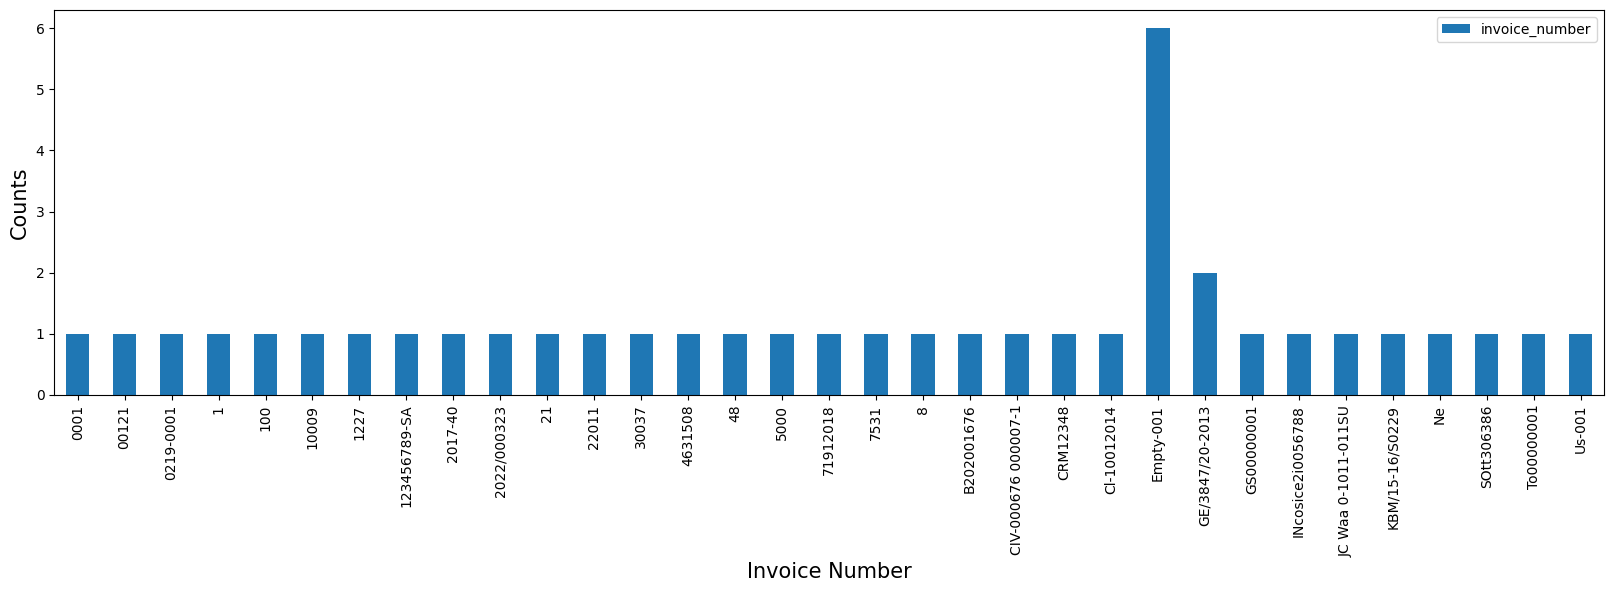

In [78]:
plt.figure(figsize=(20, 5))
df.groupby(["invoice_number"])["invoice_number"].count().plot(kind="bar")
plt.xlabel("Invoice Number", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("", fontsize=15)
plt.legend()
plt.show()

In [79]:
df['total'].dtype

dtype('O')

In [80]:
df.total = pd.to_numeric(df['total'], errors='coerce')
df.total.dtype

dtype('float64')

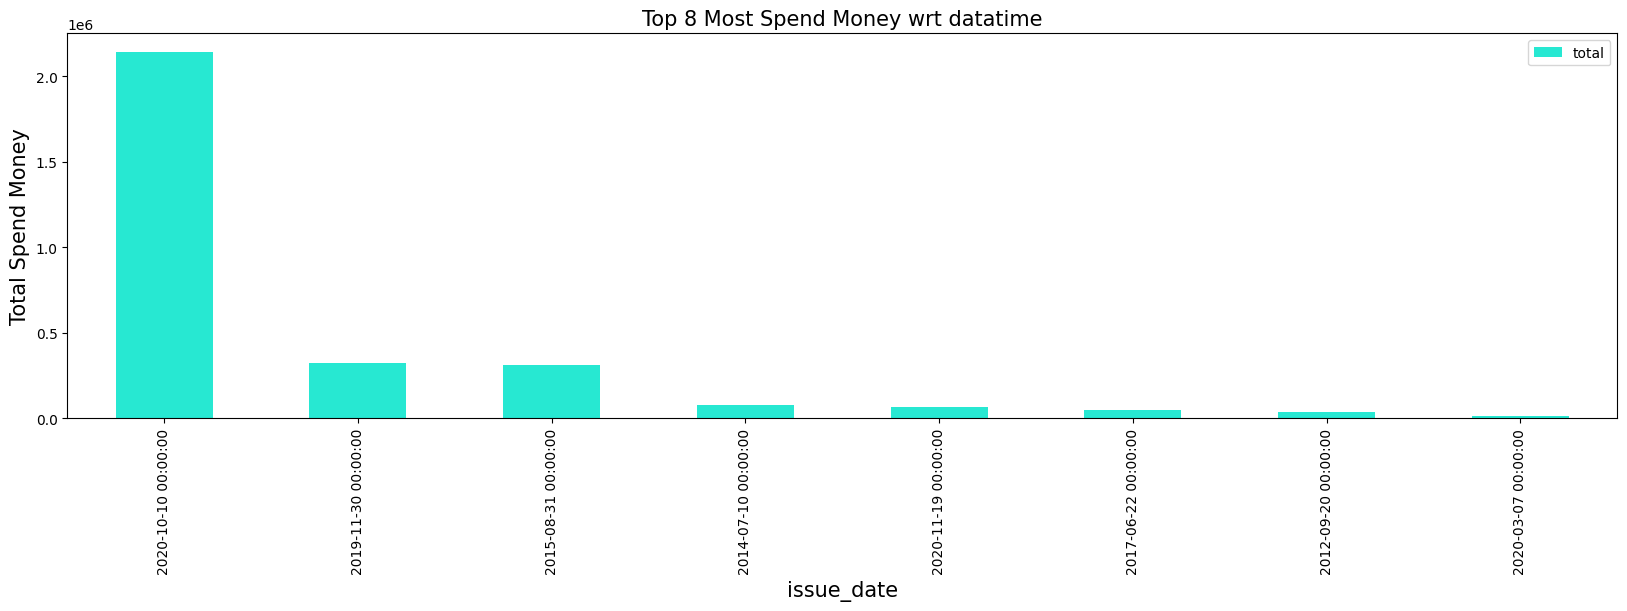

In [81]:
plt.figure(figsize=(20, 5))
df.groupby(["issue_date"])["total"].sum(
).sort_values(ascending=False).head(8).plot(kind="bar", color="#27E8D2")
plt.xlabel("issue_date", fontsize=15)
plt.ylabel("Total Spend Money", fontsize=15)
plt.title("Top 8 Most Spend Money wrt datatime", fontsize=15)
plt.legend()
plt.show()

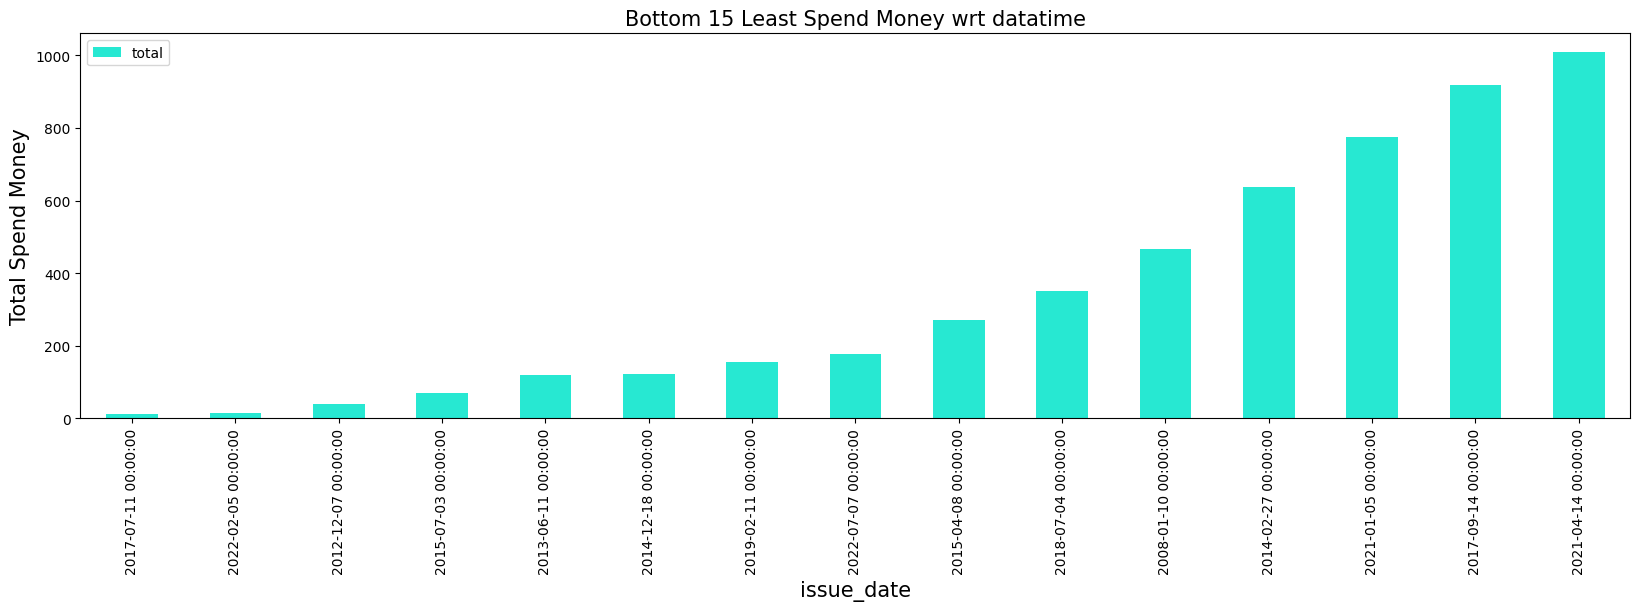

In [82]:
plt.figure(figsize=(20, 5))
df.groupby(["issue_date"])["total"].sum(
).sort_values(ascending=True).head(15).plot(kind="bar", color="#27E8D2")
plt.xlabel("issue_date", fontsize=15)
plt.ylabel("Total Spend Money", fontsize=15)
plt.title("Bottom 15 Least Spend Money wrt datatime", fontsize=15)
plt.legend()
plt.show()

In [83]:
df = df.sort_values(by='issue_date')

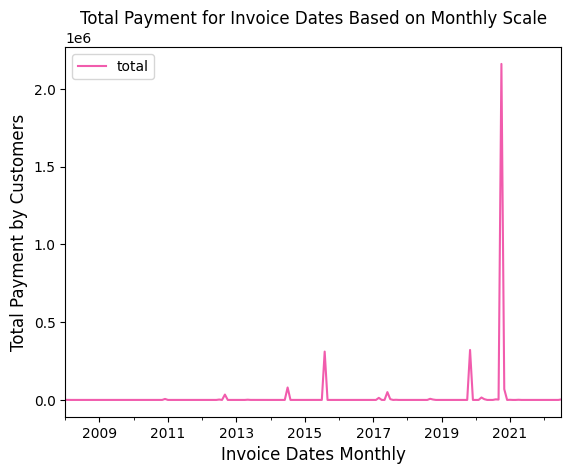

In [84]:
df.groupby(pd.Grouper(key="issue_date", freq="M"))["total"].sum().plot(color=["#F15CAD"])
plt.xlabel("Invoice Dates Monthly", fontsize=12)
plt.ylabel("Total Payment by Customers", fontsize=12)
plt.title("Total Payment for Invoice Dates Based on Monthly Scale", fontsize=12)
plt.legend()

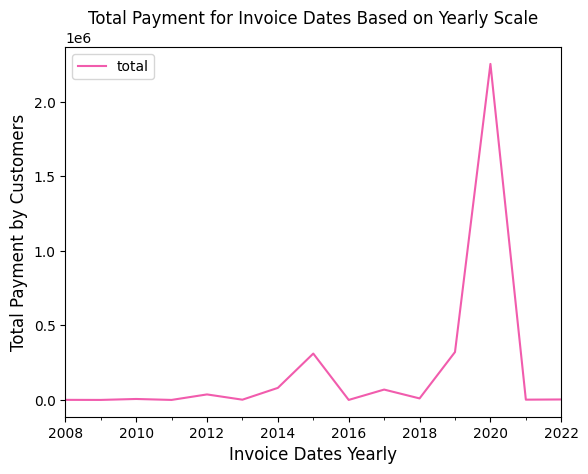

In [85]:
df.groupby(pd.Grouper(key="issue_date", freq="Y"))["total"].sum().plot(color=["#F15CAD"])
plt.xlabel("Invoice Dates Yearly", fontsize=12)
plt.ylabel("Total Payment by Customers", fontsize=12)
plt.title("Total Payment for Invoice Dates Based on Yearly Scale", fontsize=12)
plt.legend()

# Sort highest payment accordint to invoices

In [86]:
df.groupby(["title"])["total"].sum(
).sort_values(ascending=False).head(10)

title
522a7c5f-166c-479f-8801-10d43d83a3b9.png    2120000.00
292518c6-bfd4-4096-92a1-7df63faf0860.png     321113.82
fd28f5e7-fc19-4f23-8dec-9a87b40f1a15.jpg     310693.00
e45e92a6-3cd7-495a-8e47-ab95d1cdda3e.png      80000.00
2a8677b9-b29e-4c93-86e5-56d4c38cb7fc.jpg      62000.00
151d0d84-bfb4-4338-8839-90d69a1a3074.png      50240.00
4cfc9619-5dd4-4307-90b6-04d20ba6db3b.jpg      34436.50
8e00367b-25b3-401b-bf8e-e1cfc801e4ae.png      23600.00
77502028-18e6-4a51-9b7d-0cc5f4a68726.jpg      15576.00
3e2ef304-3cb7-4452-87b8-102bea1c2908.jpg      13375.00
Name: total, dtype: float64

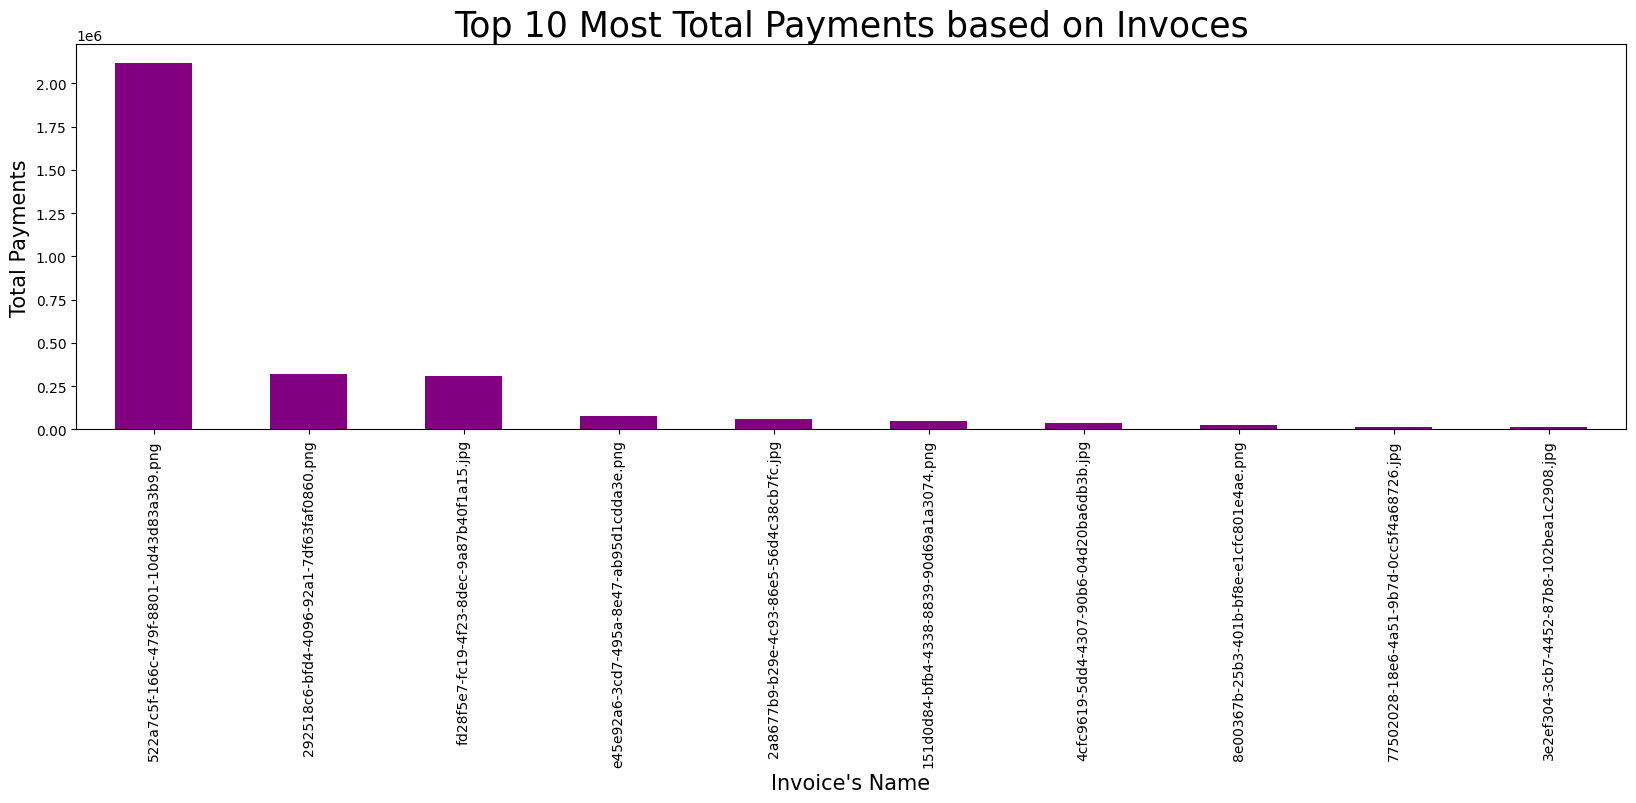

In [87]:
plt.figure(figsize=(20, 5))
df.groupby("title")["total"].sum(
).sort_values(ascending=False).head(10).plot(kind="bar", color="purple")
plt.xlabel("Invoice's Name", fontsize=15)
plt.ylabel("Total Payments", fontsize=15)
plt.title("Top 10 Most Total Payments based on Invoces", fontsize=25)
plt.show()

In [88]:
df.groupby(["title"])["total"].sum(
).sort_values(ascending=True).head(10)

title
aacc330f-a0ad-4248-bce9-9eab83818e2b.jpg      0.00
e34b2104-7996-488f-a71a-af1819bd8f9f.png     10.60
7b450c61-a83d-4843-8404-0828b0d62891.jpg     14.00
70de9d18-4aff-40bc-b60a-db7dec2b5af7.jpg     39.65
21dd0238-661b-4d4a-8d6f-8b7717d229fc.png     70.00
72c641c1-d057-48ab-9d1f-2abb143c691d.png    120.00
a7e533f9-fea3-453e-b135-6b6d9d3c63a6.jpg    121.00
77ed1272-512c-4389-8a38-3798084cb073.png    154.06
2ec7883e-dafe-4cc3-9836-7314ace98c14.png    176.60
281dec77-e364-494e-9a67-0d862b5a509e.png    270.00
Name: total, dtype: float64

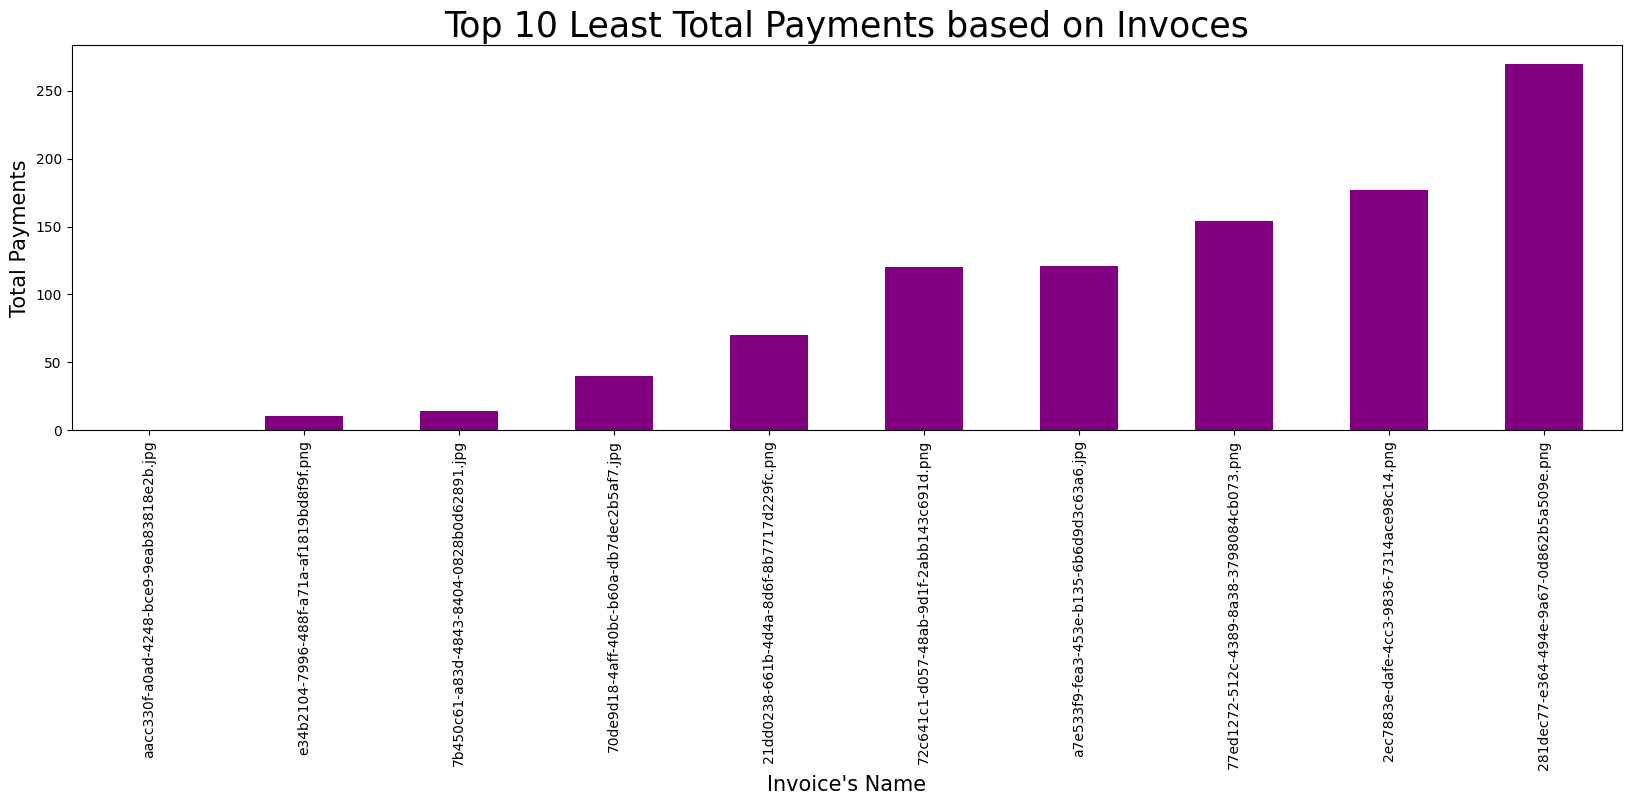

In [89]:
plt.figure(figsize=(20, 5))
df.groupby("title")["total"].sum(
).sort_values(ascending=True).head(10).plot(kind="bar", color="purple")
plt.xlabel("Invoice's Name", fontsize=15)
plt.ylabel("Total Payments", fontsize=15)
plt.title("Top 10 Least Total Payments based on Invoces", fontsize=25)
plt.show()

# Final Insights

* There are 41 invoices total. 
* Out of which 1 is discarded because it didn't have issue date column. 
* Invoice number having null values are given a number Empty-001.
* For total having null value meaning no expenses so, 0.
* FOr table value if none it is filled with NULL
* The plot of counts of invoice number is plotted. 
* Most spend money and least spent money according to datetime is plotted. 
* Total Payment for Invoice Dates Based on Monthly Scale and yearly scale is plotted 
* Top 10 invoices which had most total payments was plotted. 
* Top 10 invoices which had least total payments were plotted. 